In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('data.csv')

x_columns = ["orientation", "roof_transfer", "wall_transfer", "window_transfer"]
y_columns = ["output1", "output2"]
X = df[x_columns].values
y = df[y_columns].values

scaler_output2 = MinMaxScaler(feature_range=(0, 1))
y[:, 1] = scaler_output2.fit_transform(y[:, 1].reshape(-1, 1)).flatten()

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

model.save('model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2019 - mae: 0.4116 - val_loss: 0.1600 - val_mae: 0.3496
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1136 - mae: 0.2910 - val_loss: 0.0859 - val_mae: 0.2390
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0581 - mae: 0.1894 - val_loss: 0.0354 - val_mae: 0.1490
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0242 - mae: 0.1221 - val_loss: 0.0189 - val_mae: 0.1068
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0231 - mae: 0.1134 - val_loss: 0.0171 - val_mae: 0.1024
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186 - mae: 0.1028 - val_loss: 0.0158 - val_mae: 0.0992
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - mae: 0.0930 - val_loss: 0.0155 - val_mae: 0.0976
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - mae: 0.0908 - val_loss: 0.0141 - val_mae: 0.0934
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mae: 0.0862

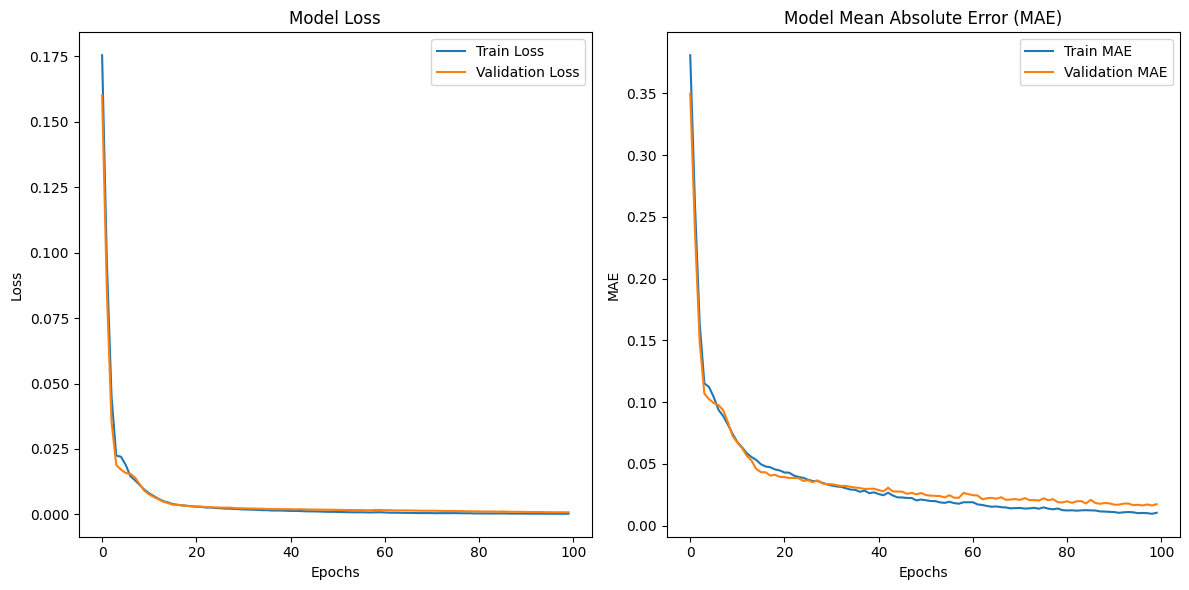

In [3]:
import matplotlib.pyplot as plt

# 학습 손실 값 (loss) 시각화
plt.figure(figsize=(12, 6))

# 손실 값 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 평균 절대 오차 (mae) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [4]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - loss: 7.8770e-04 - mae: 0.0173
Test Loss: 0.0007876965100876987, Test MAE: 0.017336156219244003


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


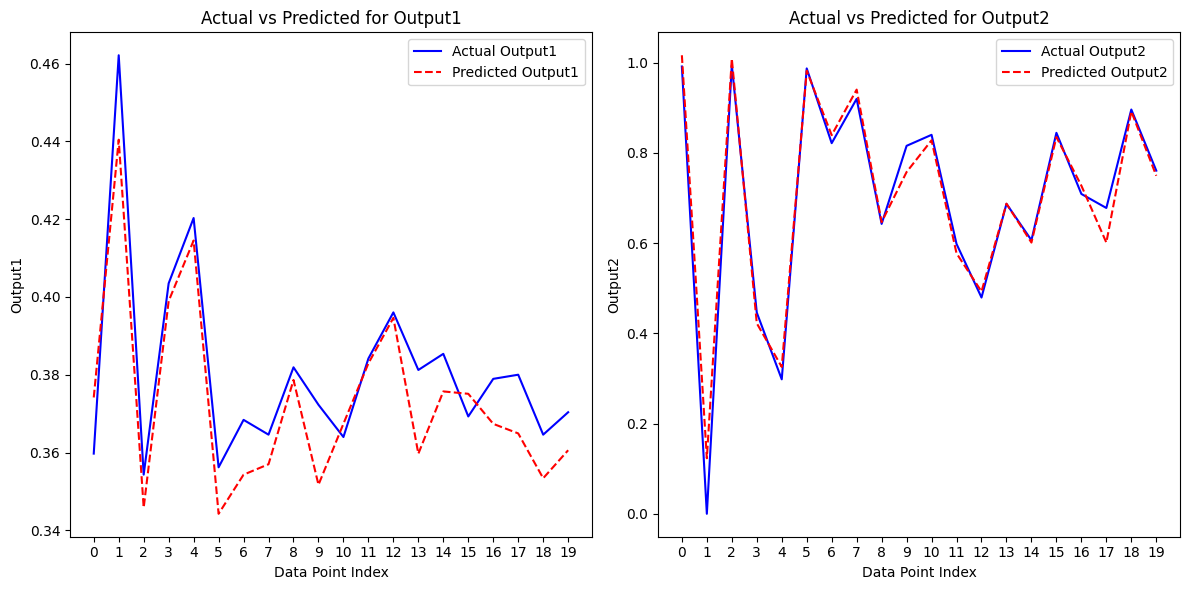

In [5]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Generate the index of the data points for x-axis (this will be the index of test data)
data_index = range(len(y_test))

# Plot for output1 (compare actual vs predicted)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data_index, y_test[:, 0], label='Actual Output1', color='blue')
plt.plot(data_index, y_pred[:, 0], label='Predicted Output1', color='red', linestyle='--')
plt.title('Actual vs Predicted for Output1')
plt.xlabel('Data Point Index')
plt.ylabel('Output1')
plt.legend()

# Set x-axis ticks with a step of 1
plt.xticks(range(0, len(y_test), 1))

# Plot for output2 (compare actual vs predicted)
plt.subplot(1, 2, 2)
plt.plot(data_index, y_test[:, 1], label='Actual Output2', color='blue')
plt.plot(data_index, y_pred[:, 1], label='Predicted Output2', color='red', linestyle='--')
plt.title('Actual vs Predicted for Output2')
plt.xlabel('Data Point Index')
plt.ylabel('Output2')
plt.legend()

# Set x-axis ticks with a step of 1
plt.xticks(range(0, len(y_test), 1))

# Show the plots
plt.tight_layout()
plt.show()
